**About:** This dataset is about the survival of patients between 1958 and 1970 at the University of Chicago's Billings Hospital who had undergone surgery for breast cancer. 

**Information of the features:**

patient_age : Age of patient at the time of operation.

year_of_operation : Patient's year of operation

nos_pos_axillary_nodes : Number of positive axillary nodes. Lymph node-positive means the lymph nodes contain cancer.

survival_staus : Survival status of the patient. 1 means the patient survived 5 years or longer and 2 means the patient died within 5 years of operation

**Objective:** To perform Exploratory Data Analysis on the Haberman's Survival Dataset. This is a classification problem where we need to predict, given the features, whether a patient survived or not.

**Importing and loading data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#sns.set_context("talk");

In [3]:
# import data

# dataset can be downloaded from here: https://www.kaggle.com/gilsousa/habermans-survival-data-set/downloads/haberman.csv/1

haberman = pd.read_csv('./dataset/haberman.csv')

In [4]:
# Taking a look at the imported data
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Note:** It seems that the row names are not present for this data. We will now add the column names from the kaggle  site. 

In [5]:
# Adding column names to the haberman dataframe
haberman.columns = ['patient_age', 'year_of_operation', 'nos_pos_axillary_nodes', 'survival_status']
haberman.head()

,patient_age,year_of_operation,nos_pos_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**Simple Analysis**

In [6]:
# How many rows of observations and columns of features?
haberman.shape

(305, 4)

In [7]:
# General overview of the dataset
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
patient_age               305 non-null int64
year_of_operation         305 non-null int64
nos_pos_axillary_nodes    305 non-null int64
survival_status           305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [8]:
# What are the column names and the datatype of the columns?
haberman.dtypes

patient_age               int64
year_of_operation         int64
nos_pos_axillary_nodes    int64
survival_status           int64
dtype: object

In [9]:
# Check if missing data is present in the data
haberman.isnull().sum()

patient_age               0
year_of_operation         0
nos_pos_axillary_nodes    0
survival_status           0
dtype: int64

**Observations**
1. There are 305 observations for 4 columns. 
2. There are no missing values in the data.
3. All the column have data type int. 
4. The columns patient_age, year_of_opeation, nos_pos_axillary_node are predictor variables and the column survival_status is the response variable.

**Univariate Analysis**

In [10]:
# Taking a random peek at the survival_status column
haberman.survival_status.sample(10).head(10)

90     2
242    1
218    1
26     1
228    2
71     1
181    1
184    1
153    1
102    1
Name: survival_status, dtype: int64

**Note:** Looking at the random observations of the response variable, it seems that 1 is used for the patients that survived and the patients who did not survive are represented by 2. 

In [11]:
# Of the total 305 patients, how many patients survived and how many didn't
 
print(haberman.survival_status.value_counts())

1    224
2     81
Name: survival_status, dtype: int64


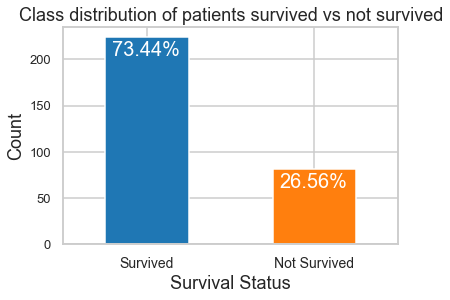

In [33]:
# Visualizing the above result

# stackoverflow reference: https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn


ax = haberman['survival_status'].value_counts().plot(kind='bar', fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Class distribution of patients survived vs not survived", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.set_xlabel('Survival Status')
ax.set_xticklabels(['Survived','Not Survived'], rotation=0, fontsize=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()-20, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=20,
                color='white')
   

**Observation:**
1. The ratio of patients who survived to who didn't is roughly **73:27**. This is an unbalanced dataset.

**Pair Plot**

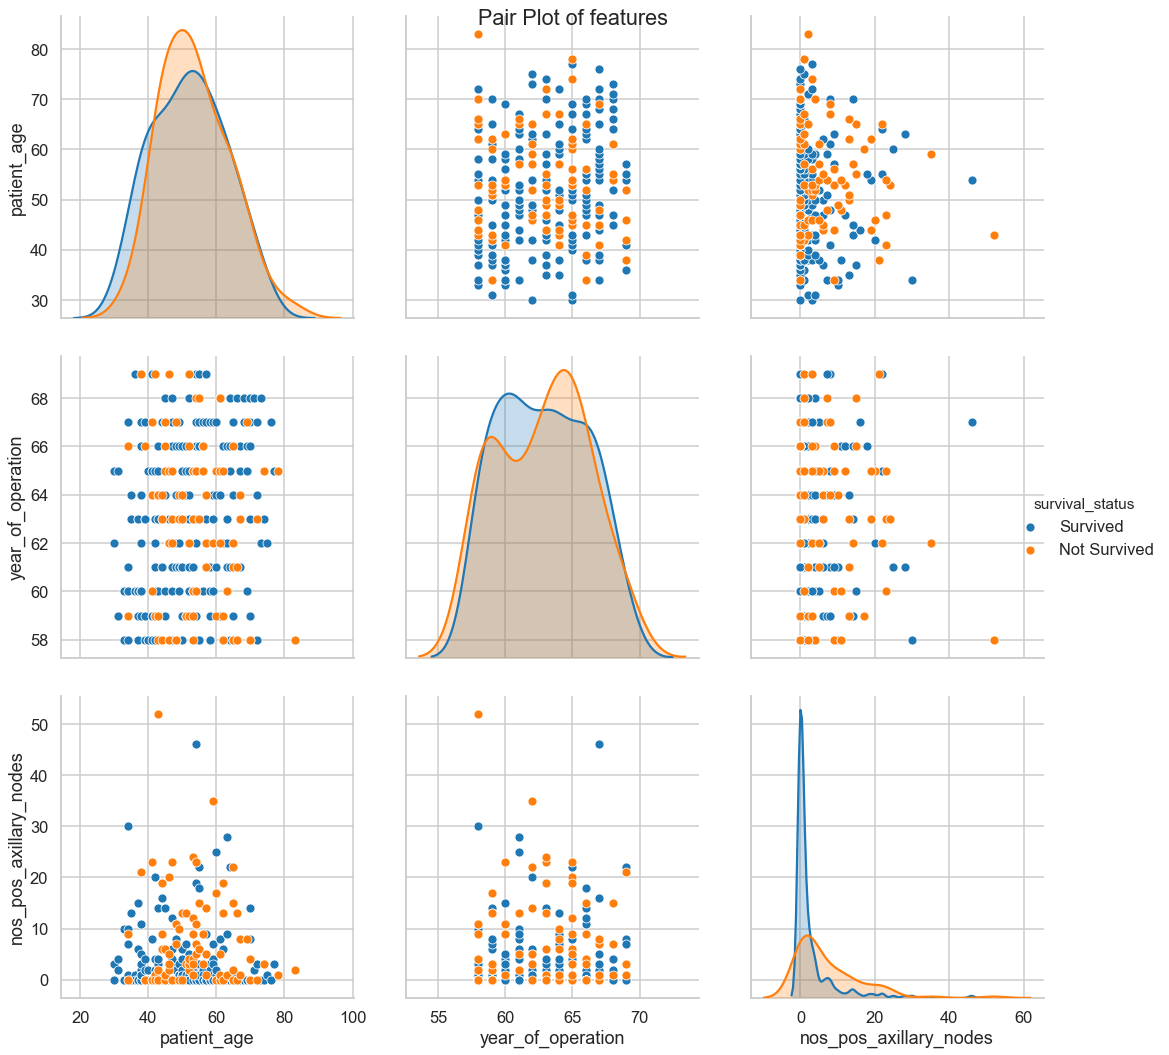

In [34]:
sns.set_style("whitegrid");
l1 = sns.pairplot(haberman, hue="survival_status",vars=["patient_age", "year_of_operation","nos_pos_axillary_nodes"], height=5);
plt.suptitle('Pair Plot of features')


# replace labels
new_labels = ['Survived', 'Not Survived']
for t, l in zip(l1._legend.texts, new_labels): t.set_text(l);

plt.show()

**Observation:**
1. The tightly overlapping areas in PDF suggest that the survival classes are not easily separable.
2. The pair-plot doesn't reveal much analysis about the features

**Splitting haberman data on the basis of survival_status**

In [14]:
haberman_survived = haberman[haberman['survival_status'] == 1]
haberman_survived.head()

,patient_age,year_of_operation,nos_pos_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [15]:
haberman_not_survived = haberman[haberman['survival_status'] == 2]
haberman_not_survived.head()

,patient_age,year_of_operation,nos_pos_axillary_nodes,survival_status
6,34,59,0,2
7,34,66,9,2
23,38,69,21,2
33,39,66,0,2
42,41,60,23,2


In [16]:
haberman_survived.describe()

,patient_age,year_of_operation,nos_pos_axillary_nodes,survival_status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [17]:
haberman_not_survived.describe()

,patient_age,year_of_operation,nos_pos_axillary_nodes,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


**Bivariate Analysis**

<Figure size 1440x720 with 0 Axes>

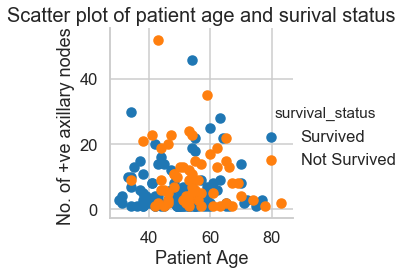

In [35]:
sns.set_style("whitegrid");
plt.figure(figsize=(20,10));
ll = sns.FacetGrid(haberman[haberman.nos_pos_axillary_nodes>0], hue = 'survival_status', size =4) \
   .map(plt.scatter, "patient_age", "nos_pos_axillary_nodes") \
   .add_legend();
    

new_labels = ['Survived', 'Not Survived']
for t, l in zip(ll._legend.texts, new_labels): t.set_text(l);
    
plt.title('Scatter plot of patient age and surival status', size= 20);
plt.xlabel("Patient Age");
plt.ylabel("No. of +ve axillary nodes ");
plt.show();

**Observation:** The scatter plot between patient age and number of axillary nodes is not descriptive enough.

**PDF, CDF**

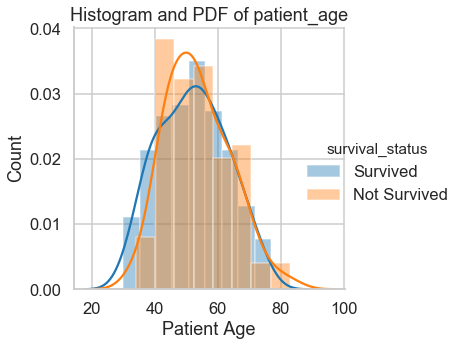

In [36]:
ll = sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "patient_age") \
       .add_legend();

new_labels = ['Survived', 'Not Survived']
for t, l in zip(ll._legend.texts, new_labels): t.set_text(l);

plt.title('Histogram and PDF of patient_age')
plt.ylabel('Count')
plt.xlabel('Patient Age')
plt.show();

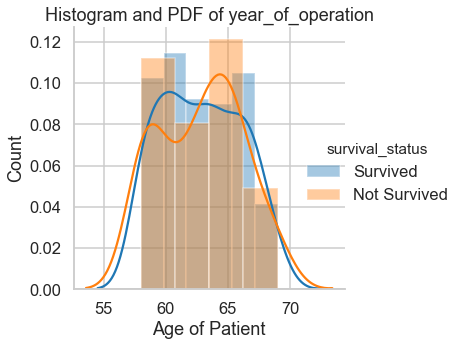

In [37]:
ll = sns.FacetGrid(haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "year_of_operation") \
       .add_legend();

new_labels = ['Survived', 'Not Survived']
for t, l in zip(ll._legend.texts, new_labels): t.set_text(l);

plt.title('Histogram and PDF of year_of_operation')
plt.ylabel('Count')
plt.xlabel('Age of Patient')

plt.show();

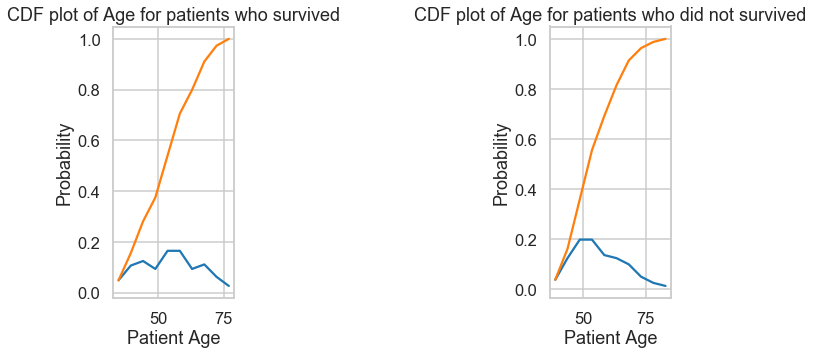

In [38]:
plt.figure(figsize=(10,5))   #figsize(width, height)
plt.figure(1)                
plt.subplot(141)

counts, bin_edges = np.histogram(haberman_survived['patient_age'], bins=10, density = True)
pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Patient Age")
plt.ylabel("Probability")
plt.title("CDF plot of Age for patients who survived");


plt.figure(1)                
plt.subplot(144)

counts, bin_edges = np.histogram(haberman_not_survived['patient_age'], bins=10, density = True)
pdf = counts/(sum(counts))
# print(pdf);
# print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Patient Age")
plt.ylabel("Probability")
plt.title("CDF plot of Age for patients who did not survived");


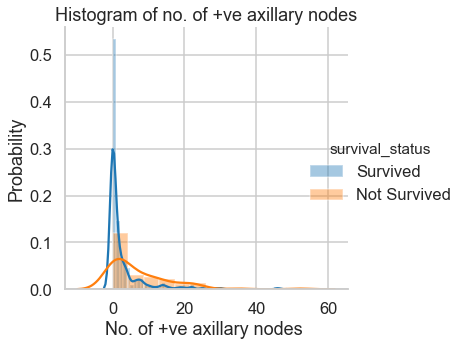

In [39]:
l1 = sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "nos_pos_axillary_nodes") \
   .add_legend();

# replace labels
new_labels = ['Survived', 'Not Survived']
for t, l in zip(l1._legend.texts, new_labels): t.set_text(l);

plt.xlabel("No. of +ve axillary nodes ")
plt.ylabel("Probability")
plt.title("Histogram of no. of +ve axillary nodes");    

**Observation:**
1. The mean and the standard deviation of patient age is almost same. 
2. Year of opeation doesn't add much value to the analysis.
3. 75% of patients who survived cancer had axillary nodes less than or equal to 3.

**Calculating median, IQR and percentiles**

In [24]:
print("The median age of patients who survived is {} years.".format(int(np.median(haberman_survived.patient_age))))
print("The median age of patients who did not survived is {} years.".format(int(np.median(haberman_not_survived.patient_age))))


The median age of patients who survived is 52 years.
The median age of patients who did not survived is 53 years.


In [25]:
print(np.percentile(haberman_survived.patient_age, 25))
print(np.percentile(haberman_survived.patient_age, 50))
print(np.percentile(haberman_survived.patient_age, 75))
print(np.percentile(haberman_survived.patient_age, 90))

43.0
52.0
60.0
67.0


In [26]:
print(np.percentile(haberman_not_survived.patient_age, 25))
print(np.percentile(haberman_not_survived.patient_age, 50))
print(np.percentile(haberman_not_survived.patient_age, 75))

46.0
53.0
61.0


In [27]:
print(np.percentile(haberman_survived.nos_pos_axillary_nodes, 25))
print(np.percentile(haberman_survived.nos_pos_axillary_nodes, 50))
print(np.percentile(haberman_survived.nos_pos_axillary_nodes, 75))
print(np.percentile(haberman_survived.nos_pos_axillary_nodes, 90))

0.0
0.0
3.0
8.0


In [28]:
print(np.percentile(haberman_not_survived.nos_pos_axillary_nodes, 25))
print(np.percentile(haberman_not_survived.nos_pos_axillary_nodes, 50))
print(np.percentile(haberman_not_survived.nos_pos_axillary_nodes, 75))
print(np.percentile(haberman_not_survived.nos_pos_axillary_nodes, 90))

1.0
4.0
11.0
20.0


**Observation**
1. The median age of patients who survived is 52 years and the median age of patients who did not survived is 53 years.
2.  Majority of patients who had auxillary nodes greater than 11 did not survice. About 75-90% patients who had nodes more than 11 did not survive. 


**Boxplots**

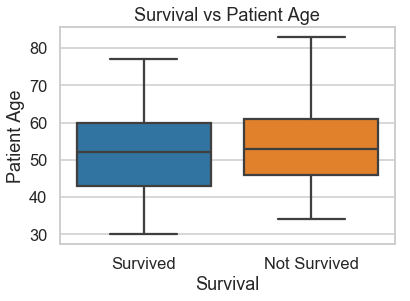

In [40]:
ax1 = sns.boxplot(data = haberman, x = "survival_status", y ='patient_age')
ax1.set_title("Survival vs Patient Age")
ax1.set_xlabel("Survival")
ax1.set_ylabel("Patient Age")
ax1.set_xticklabels(['Survived','Not Survived'])
sns.set_context("talk");

**Observation**
1. Age at quantiles 1st, 2nd and 3rd for patients who survived is: 43, 52, 63 years
2. Age at quantiles 1st, 2nd and 3rd for patients who did not survived is: 46, 53, 61 years
3. The minimum value of patient who survived is 30 and who did not survive is 34 years.

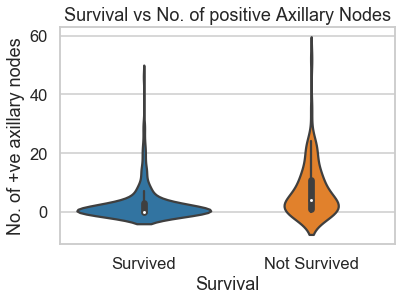

In [41]:
ax = sns.violinplot(data = haberman, x = "survival_status", y ='nos_pos_axillary_nodes')
ax.set_title("Survival vs No. of positive Axillary Nodes")
ax.set_xlabel("Survival")
ax.set_ylabel("No. of +ve axillary nodes")
ax.set_xticklabels(['Survived','Not Survived'])
sns.set_context("talk");

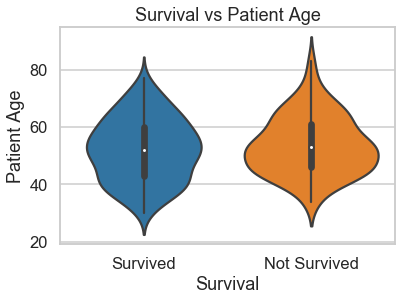

In [42]:
ax2 = sns.violinplot(data = haberman, x = "survival_status", y ='patient_age')
ax2.set_title("Survival vs Patient Age")
ax2.set_xlabel("Survival")
ax2.set_ylabel("Patient Age")
ax2.set_xticklabels(['Survived','Not Survived'])
sns.set_context("talk");

**Observation**: The violin plot gives better understanding of the spread of patients age and number of axillary positive nodes of the patients

**Multivariate Analysis**

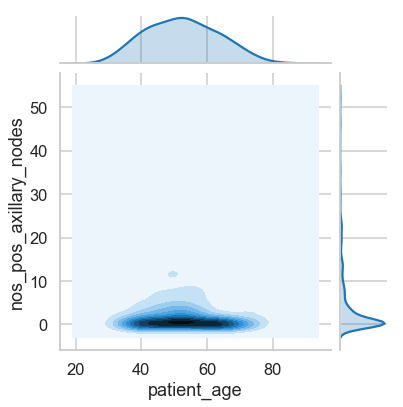

In [43]:
sns.jointplot(x="patient_age", y="nos_pos_axillary_nodes", data=haberman, kind="kde");

**Observation:** The number of axillary positive nodes for patient in range 40-60 is found to be more.

**Final Conclusions**

1. The most important features are: patient_age, nos_pos_axillary_nodes
2. The minimum age of cancer survivor when operated was 30 and that of the patient who didn't survive is 34. We can infer that the earlier cancer is operated upon, the better chances of survival.

**To do next**

1. surivial_status values need to be updated. 2 represents did not survive. Instead, we can replace 2 by 0 which essentially states that the patient did not survive.
2. Change the datatype of survival_status from int to categorical.
3. As it is evident from the description of the data, this dataset was recorded in the year 1958 and 1970. So to make the year_of_operation values more interpretable, we can convert 58 to 1958, 59 to 1957 and so on.
4. Try different machine learning techniques that can be used to classify patients who will survive the surgery or not